<a href="https://colab.research.google.com/github/Shooleralbany/-home11-grad-2021-sh236571/blob/main/Heartold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install cartopy
%pip install statsmodels
%pip install pyleoclim
%pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.4/996.4 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.8/885.8 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import numpy as np

In [9]:
# Access Google Drive locally
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nan, nan, 44.05, nan, nan, nan, 41.56, nan, nan, nan, 40.74, nan, nan, nan, 40.48, nan, nan, nan, 40.53, nan, nan, nan, 40.68, nan, nan, nan, 40.64, nan, nan, nan, 40.35, nan, nan, nan, 41.46, nan, nan, nan, 41.06, nan, nan, nan, 42.49, nan, nan, nan, 40.8, nan, nan, nan, 42.93, nan, nan, nan, 40.84, nan, nan, nan, 43.53, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 51.13, nan, nan, nan, 55.54, nan, nan, nan, 55.5, nan, nan, nan, 56.6, nan, nan, nan, 54.53, nan, nan, nan, 53.47, nan, nan, nan, 56.52, nan, nan, nan, 59.18, nan, nan, nan, 59.67, nan, nan, nan, 60.42, nan, nan, nan, 59.02, nan, nan, nan, 59.07, nan, nan, nan, 56.97, nan, nan, nan, 55.56, nan, nan, nan, 54.91, nan, nan, nan, 53.77, nan, nan, nan, 55.46, nan, nan, nan, 55.81, nan, nan, nan, 52.38, nan, nan, nan, 52.55, nan, nan, nan, 54.13, nan, nan, nan, 50.59, nan, nan, nan, 50.59, nan, nan, nan, 51.37, nan, nan, nan, 51.92, nan, nan, nan, 53.99, nan, nan, nan, 51.89, nan, nan, nan, 52.05, nan, nan, n

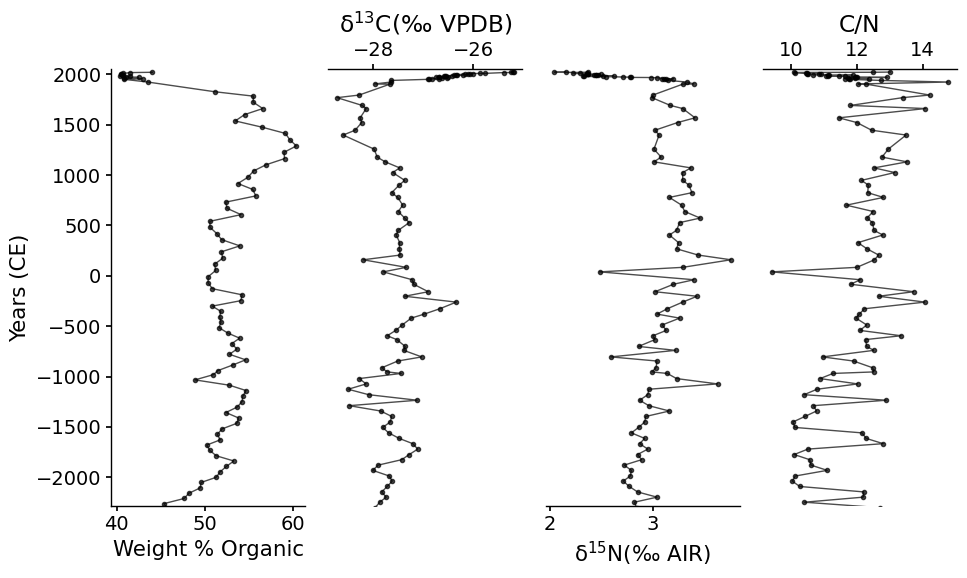

In [6]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Heartold.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
print(values1)


non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()



# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)



# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()

axes[0].set_ylim([-2280, 2050])
axes[1].set_ylim([-2280, 2050])
axes[2].set_ylim([-2280, 2050])
axes[3].set_ylim([-2280, 2050])


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

[nan, nan, 44.05, nan, nan, nan, 41.56, nan, nan, nan, 40.74, nan, nan, nan, 40.48, nan, nan, nan, 40.53, nan, nan, nan, 40.68, nan, nan, nan, 40.64, nan, nan, nan, 40.35, nan, nan, nan, 41.46, nan, nan, nan, 41.06, nan, nan, nan, 42.49, nan, nan, nan, 40.8, nan, nan, nan, 42.93, nan, nan, nan, 40.84, nan, nan, nan, 43.53, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 51.13, nan, nan, nan, 55.54, nan, nan, nan, 55.5, nan, nan, nan, 56.6, nan, nan, nan, 54.53, nan, nan, nan, 53.47, nan, nan, nan, 56.52, nan, nan, nan, 59.18, nan, nan, nan, 59.67, nan, nan, nan, 60.42, nan, nan, nan, 59.02, nan, nan, nan, 59.07, nan, nan, nan, 56.97, nan, nan, nan, 55.56, nan, nan, nan, 54.91, nan, nan, nan, 53.77, nan, nan, nan, 55.46, nan, nan, nan, 55.81, nan, nan, nan, 52.38, nan, nan, nan, 52.55, nan, nan, nan, 54.13, nan, nan, nan, 50.59, nan, nan, nan, 50.59, nan, nan, nan, 51.37, nan, nan, nan, 51.92, nan, nan, nan, 53.99, nan, nan, nan, 51.89, nan, nan, nan, 52.05, nan, nan, n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

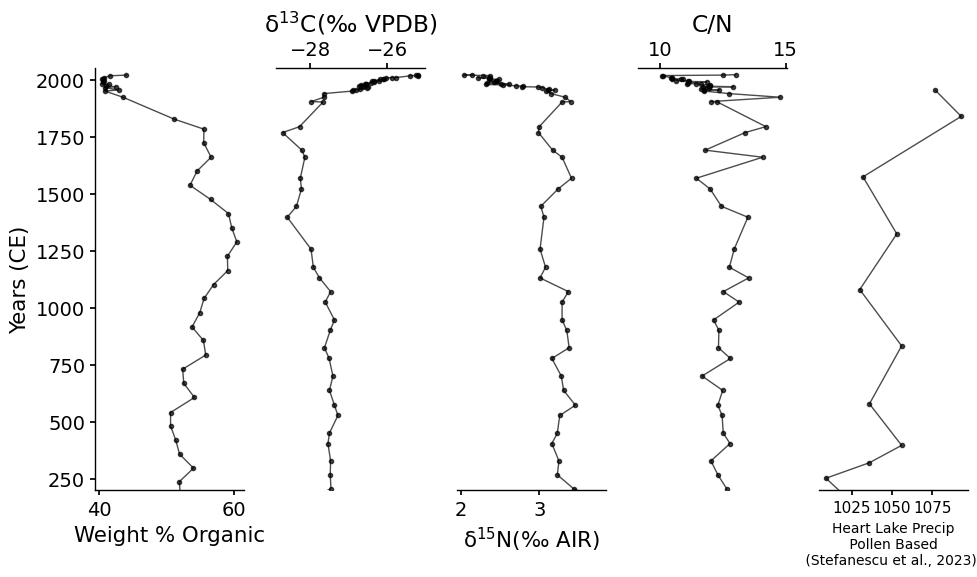

In [14]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Heartold.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
print(values1)

# 1. Reading the data from the first TXT file (Challisdata.txt)
data_dir = '/content/drive/MyDrive/Time Series'
data1 = pd.read_csv(data_dir + '/Longprecip.txt', sep='\t')
dates1 = data1['CE'].tolist()
values5 = data1['Precip'].tolist()

non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()

# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[4].plot(values5, dates1, label='Heart Precip', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)


# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()

axes[4].set_title('')
axes[4].set_xlabel('Heart Lake Precip\n Pollen Based \n (Stefanescu et al., 2023)  ', fontsize=10)
axes[4].set_yticks([])
axes[4].spines['left'].set_visible(False)
axes[4].tick_params(axis='x', rotation=0)
axes[4].grid(False)
axes[4].tick_params(axis='both', labelsize=11)

axes[0].set_ylim([200, 2050])
axes[1].set_ylim([200, 2050])
axes[2].set_ylim([200, 2050])
axes[3].set_ylim([200, 2050])
axes[4].set_ylim([200, 2050])


# Adjust layout and show the plots
plt.tight_layout()
plt.savefig("Heartoldlong.png")
files.download("Heartoldlong.png")
plt.show()

[nan, nan, 44.05, nan, nan, nan, 41.56, nan, nan, nan, 40.74, nan, nan, nan, 40.48, nan, nan, nan, 40.53, nan, nan, nan, 40.68, nan, nan, nan, 40.64, nan, nan, nan, 40.35, nan, nan, nan, 41.46, nan, nan, nan, 41.06, nan, nan, nan, 42.49, nan, nan, nan, 40.8, nan, nan, nan, 42.93, nan, nan, nan, 40.84, nan, nan, nan, 43.53, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 51.13, nan, nan, nan, 55.54, nan, nan, nan, 55.5, nan, nan, nan, 56.6, nan, nan, nan, 54.53, nan, nan, nan, 53.47, nan, nan, nan, 56.52, nan, nan, nan, 59.18, nan, nan, nan, 59.67, nan, nan, nan, 60.42, nan, nan, nan, 59.02, nan, nan, nan, 59.07, nan, nan, nan, 56.97, nan, nan, nan, 55.56, nan, nan, nan, 54.91, nan, nan, nan, 53.77, nan, nan, nan, 55.46, nan, nan, nan, 55.81, nan, nan, nan, 52.38, nan, nan, nan, 52.55, nan, nan, nan, 54.13, nan, nan, nan, 50.59, nan, nan, nan, 50.59, nan, nan, nan, 51.37, nan, nan, nan, 51.92, nan, nan, nan, 53.99, nan, nan, nan, 51.89, nan, nan, nan, 52.05, nan, nan, n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

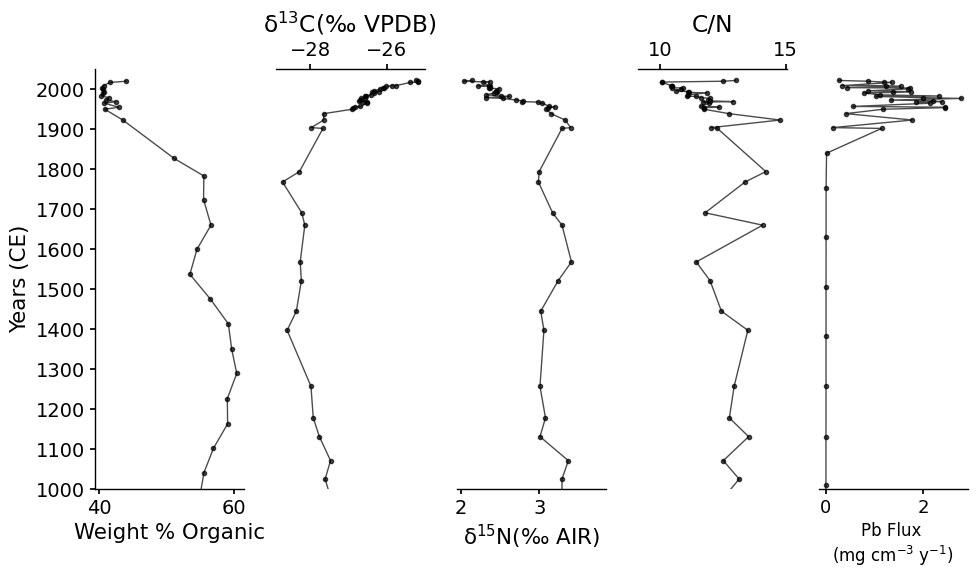

In [12]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Heartold.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
values4 = data['Pb Flux'].tolist()
print(values1)

non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
non_nan_data5 = data[['CE','Pb Flux']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5 = non_nan_data5 ['Pb Flux'].tolist()

# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[4].plot(values_non_nan5, dates_non_nan5, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)


# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)
ce_ticks = [1000,1100, 1200,1300, 1400,1500, 1600,1700, 1800,1900, 2000]  # Add more values as needed
axes[0].set_yticks(ce_ticks)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()

axes[4].set_title('')
axes[4].set_xlabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$) ', fontsize=12)
axes[4].set_yticks([])
axes[4].spines['left'].set_visible(False)
axes[4].tick_params(axis='x', rotation=0)
axes[4].grid(False)
axes[4].tick_params(axis='both', labelsize=13)

axes[0].set_ylim([1000, 2050])
axes[1].set_ylim([1000, 2050])
axes[2].set_ylim([1000, 2050])
axes[3].set_ylim([1000, 2050])
axes[4].set_ylim([1000, 2050])


# Adjust layout and show the plots
plt.tight_layout()
plt.savefig("Heartoldmetal.png")
files.download("Heartoldmetal.png")
plt.show()

In [ ]:
pip install pandas matplotlib ruptures


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.0 MB/s eta 0:00:00


In [45]:
!pip install pandas numpy matplotlib ruptures scikit-learn


In [48]:
import pandas as pd
import numpy as np

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')
values1 = data['13C'].tolist()

# Calculate mean and standard deviation
mean_value = np.mean(values1)
std_deviation = np.std(values1)

# Define the multiplier for standard deviation to set the threshold
threshold_multiplier = 2  # Adjust as needed

# Calculate the threshold
threshold = mean_value + threshold_multiplier * std_deviation

print(f"Mean: {mean_value:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Threshold: {threshold:.2f}")


Mean: nan
Standard Deviation: nan
Threshold: nan


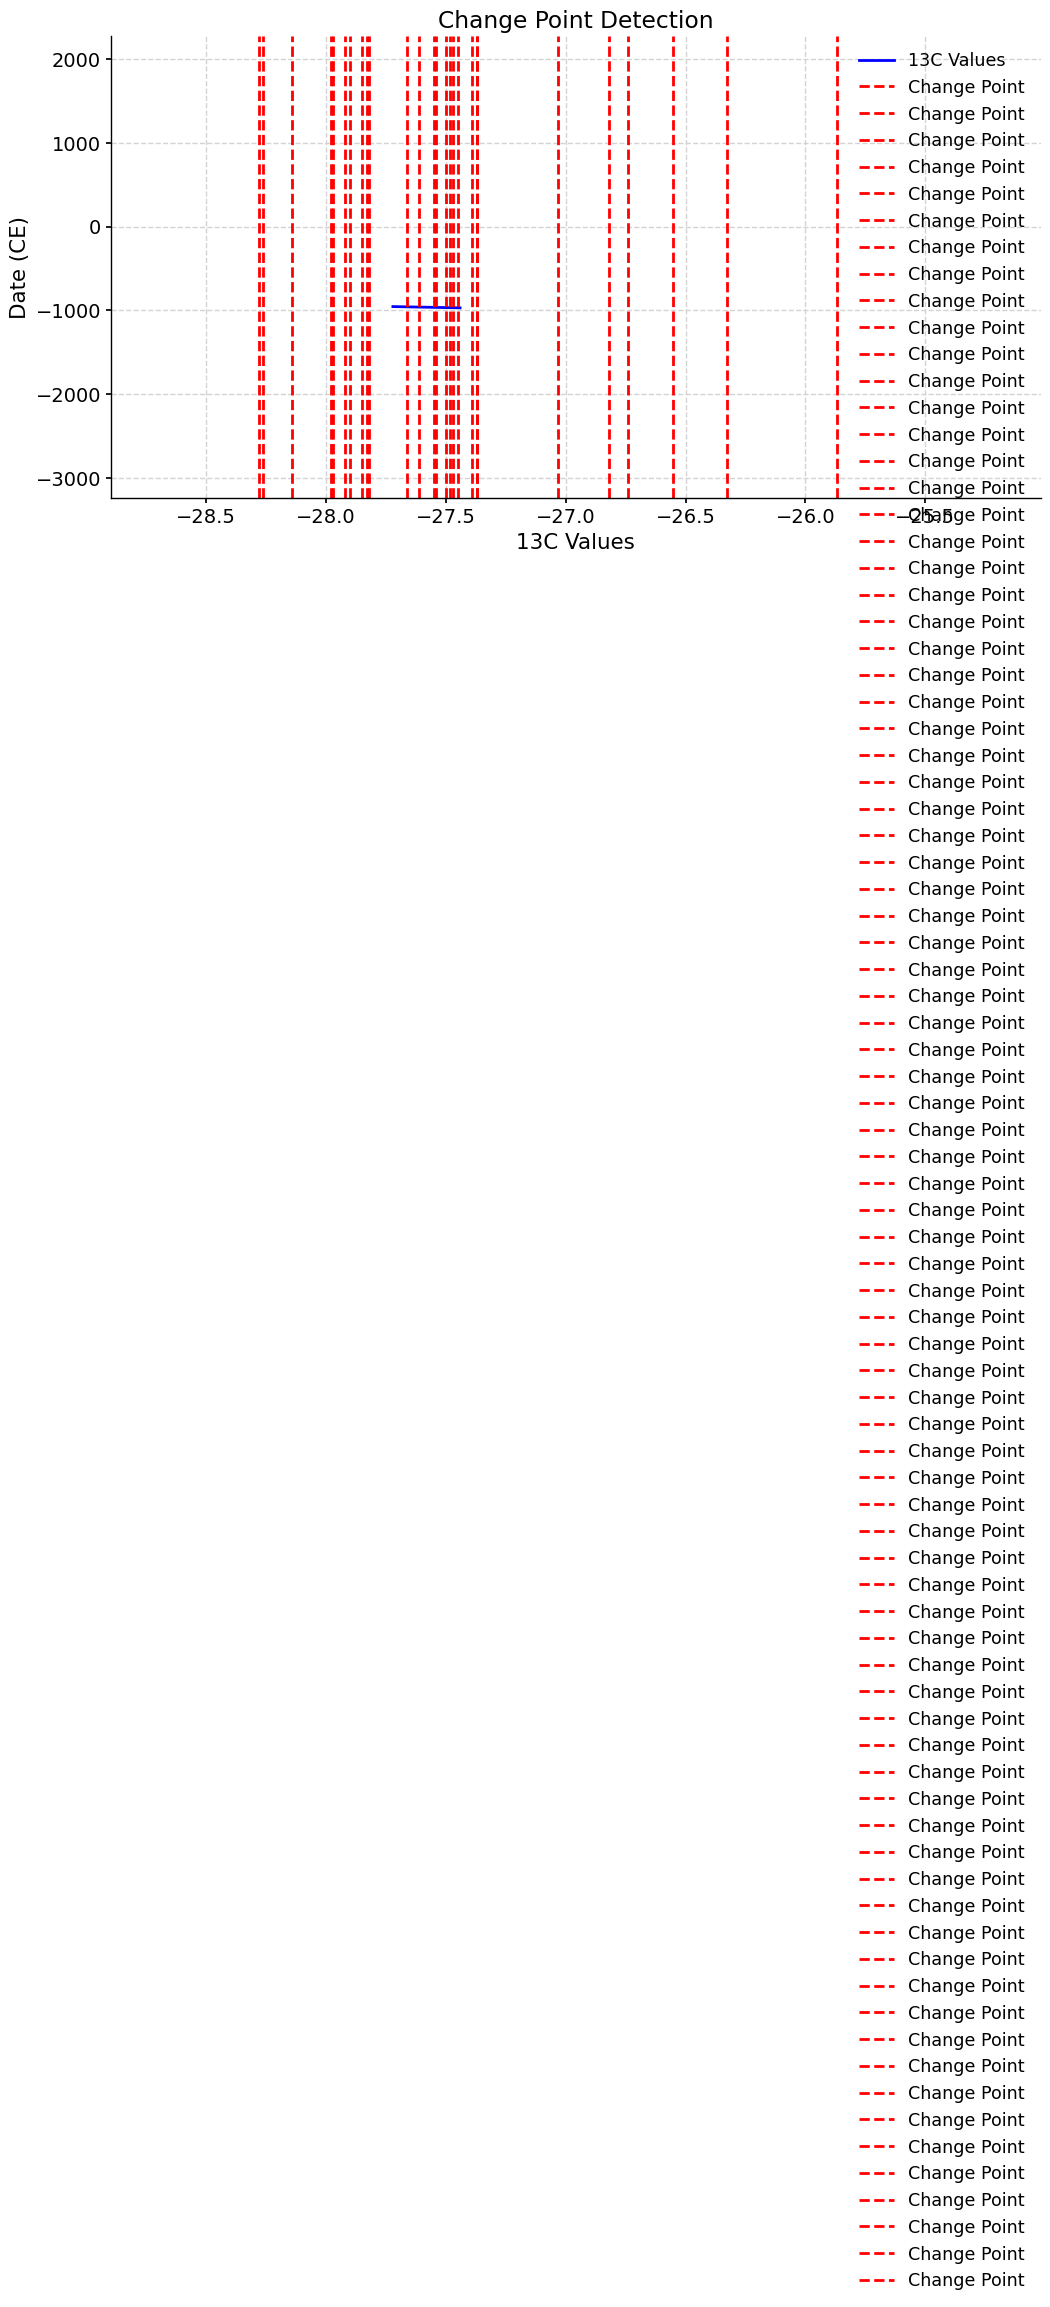

Detected Change Points: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415]


In [ ]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['13C'].tolist()

# Create a numpy array from the 'values1' list
data_array = np.array(values1)

# 2. Apply change point detection using the Pelt algorithm
model = rpt.Pelt(model="rbf").fit(data_array)
change_points = model.predict(pen=10)

# 3. Plot 'CE' on the y-axis and '13C' on the x-axis with detected change points
plt.figure(figsize=(12, 6))
plt.plot(values1, dates, label='13C Values', color='blue')

# Ensure change points are within valid indices
valid_change_points = [cp for cp in change_points if cp < len(dates)]

for cp in valid_change_points:
    plt.axvline(values1[cp], color="red", linestyle="--", linewidth=2, label='Change Point')

plt.title("Change Point Detection")
plt.xlabel("13C Values")
plt.ylabel("Date (CE)")
plt.legend()
plt.grid(True)
plt.show()

# 4. Display the detected change points
print("Detected Change Points:", valid_change_points)




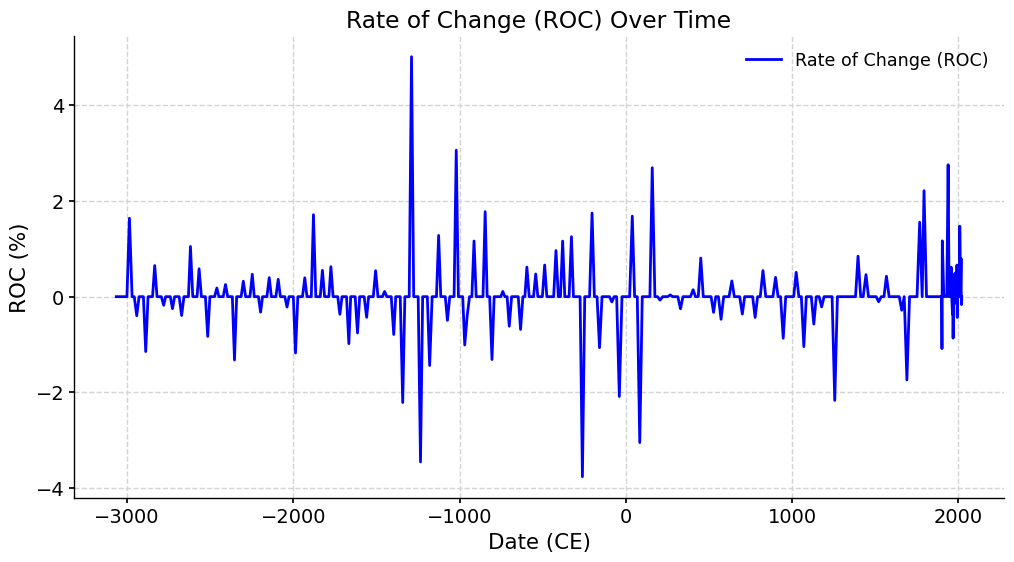

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['13C'].tolist()

# Create a DataFrame
df = pd.DataFrame({'Date': dates, '13C': values1})

# Calculate the Rate of Change (ROC) using percentage change
df['ROC'] = df['13C'].pct_change() * 100  # Percentage change in percent

# Plot the ROC over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['ROC'], label='Rate of Change (ROC)', color='blue')
plt.title('Rate of Change (ROC) Over Time')
plt.xlabel('Date (CE)')
plt.ylabel('ROC (%)')
plt.grid(True)
plt.legend()
plt.show()
